In [2]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Bioconductor version 3.12 (BiocManager 1.30.10), R 4.0.3 (2020-10-10)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘bit’, ‘bitops’, ‘formatR’, ‘bit64’, ‘plogr’, ‘RCurl’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘matrixStats’, ‘lambda.r’, ‘futile.options’, ‘RSQLite’, ‘XML’, ‘xtable’, ‘GenomeInfoDb’, ‘XVector’, ‘MatrixGenerics’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘AnnotationDbi’, ‘annotate’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘genefilter’, ‘locfit’, ‘geneplotter’, ‘RcppArmadillo’


Old packages: 'BH', 'cpp11', 'crosstalk', 'diffobj', 'DT', 'gdtools',
  'htmltools', 'xfun', 'Matrix'



In [3]:
BiocManager::install("pheatmap")

Bioconductor version 3.12 (BiocManager 1.30.10), R 4.0.3 (2020-10-10)

Installing package(s) 'pheatmap'

Old packages: 'BH', 'cpp11', 'crosstalk', 'diffobj', 'DT', 'gdtools',
  'htmltools', 'xfun', 'Matrix'



In [4]:
library(DESeq2)
library(pheatmap)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The follow

In [10]:
cts <- round(as.matrix(read.csv("https://github.com/jgalazka/UPX_analysis/raw/main/GLvsGG-DESeq2/GGandGL_counts.csv",
sep=",",row.names="gene id",check.names=FALSE)))
cts[is.na(cts)] <- 0
head(cts)

,GG-UMRR-ERCC-1,GG-UMRR-ERCC-2,GG-UMRR-ERCC-3,GG-LVR-ERCC-1,GG-LVR-ERCC-2,GG-LVR-ERCC-3,GG-SPL-ERCC-1,GG-SPL-ERCC-2,GG-SPL-ERCC-3,GL-LVR-ERCC-1,GL-LVR-ERCC-2,GL-LVR-ERCC-3,GL-SPL-ERCC-1,GL-SPL-ERCC-2,GL-SPL-ERCC-3,GL-UMRR-ERCC-1,GL-UMRR-ERCC-2,GL-UMRR-ERCC-3
ENSMUSG00000102693,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000103377,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000104017,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
ENSMUSG00000103025,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000102343,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000098104,44,40,39,11,16,18,6,10,3,0,0,0,0,0,0,0,0,0


In [11]:
pipeline = c(rep('geneglobe', 9),rep('genelab', 9))
tissue = c(rep('umrr', 3), rep('liver', 3), rep('spleen', 3), rep('liver', 3), rep('spleen', 3), rep('umrr', 3))

In [12]:
factors = data.frame(colnames(cts), pipeline, tissue)
colnames(factors) = c('sample', 'pipeline', 'tissue')
rownames(factors) = factors$sample
factors = subset(factors, select = -c(sample))
factors$pipeline = factor(factors$pipeline)
factors$tissue = factor(factors$tissue)

In [13]:
all(rownames(factors) == colnames(cts))

[1] TRUE

In [14]:
dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = factors,
                              design = ~ pipeline)
dds

converting counts to integer mode



class: DESeqDataSet 
dim: 16388 18 
metadata(1): version
assays(1): counts
rownames(16388): ENSMUSG00000102693 ENSMUSG00000103377 ... ERCC-00170
  ERCC-00171
rowData names(0):
colnames(18): GG-UMRR-ERCC-1 GG-UMRR-ERCC-2 ... GL-UMRR-ERCC-2
  GL-UMRR-ERCC-3
colData names(2): pipeline tissue

In [15]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 4 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [16]:
vsd <- vst(dds, blind=FALSE)

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.



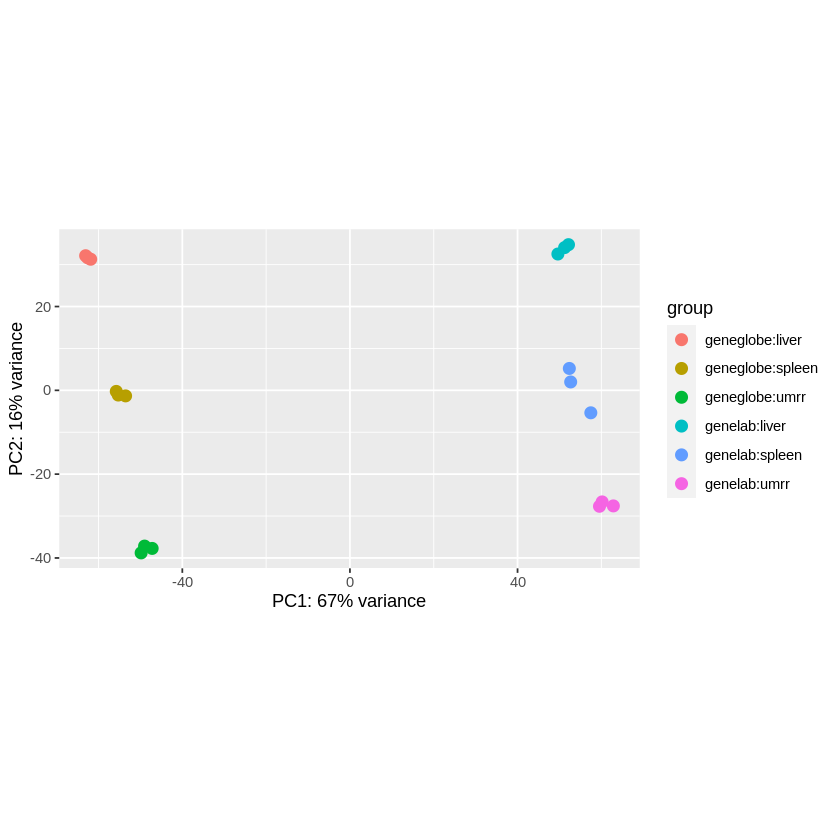

In [17]:
plotPCA(vsd, intgroup=c("pipeline","tissue"))

In [18]:
sampleDists <- dist(t(assay(vsd)))

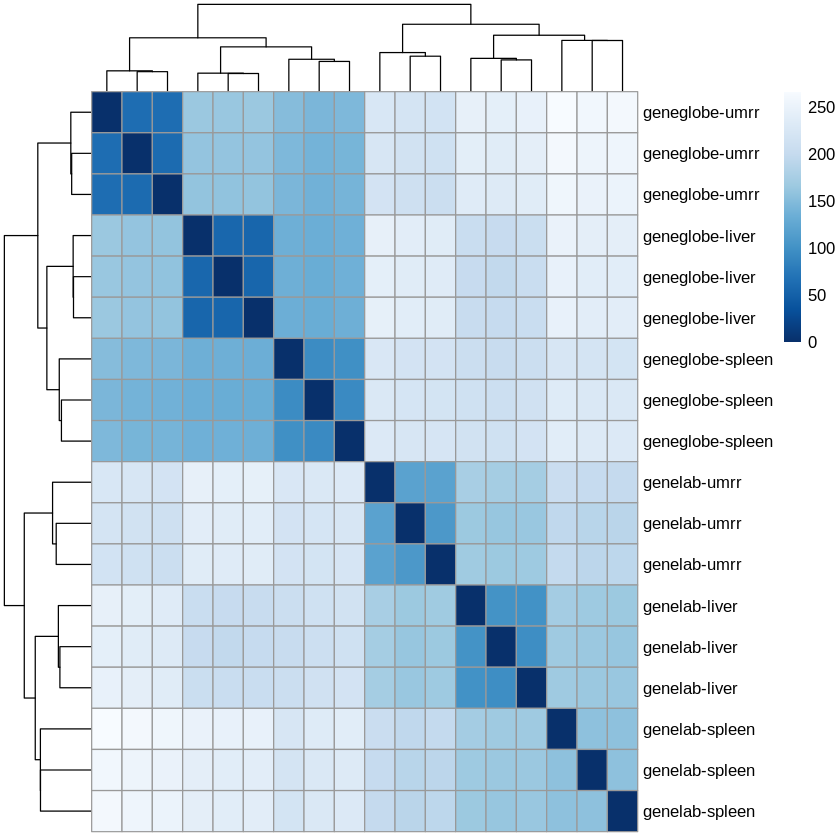

In [19]:
library("RColorBrewer")
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(vsd$pipeline, vsd$tissue, sep="-")
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)